In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import imblearn
print(imblearn.__version__)

0.9.1


In [4]:
X_test = pd.read_csv("poker-hand-testing.data")
X_train = pd.read_csv("poker-hand-training-true.data")

X_test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5', 'Hand Rank']
X_train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5', 'Hand Rank']

y_train = X_train["Hand Rank"]
y_test = X_test["Hand Rank"]

In [5]:
X_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Hand Rank
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [6]:
rank_counts_train = y_test.groupby(y_train).size()

In [7]:
rank_counts_test = y_test.groupby(y_test).size()

In [8]:
rank_counts_test

Hand Rank
0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: Hand Rank, dtype: int64

In [9]:
rank_counts_train

Hand Rank
0.0    12493
1.0    10599
2.0     1206
3.0      513
4.0       93
5.0       54
6.0       36
7.0        6
8.0        5
9.0        4
Name: Hand Rank, dtype: int64

In [10]:
def percentage_shower(column_names, counts):
    _dict = dict()
    for index,col in enumerate(column_names):
        _dict[col] = (counts[index] / counts.sum()) * 100
    return _dict

In [11]:
col_names = ["Nothing in hand", "One Pair", "Two Pair", "Three of a kind", "Straight"
            "Flush", "Full House", "Four of a kind", "Straight Flush", "Royal Flush"]

In [12]:
percentage_dict_test = percentage_shower(col_names, rank_counts_test)
percentage_dict_train = percentage_shower(col_names, rank_counts_train)

In [13]:
pd_percentage_test = pd.DataFrame.from_dict(percentage_dict_test, orient='index', columns=["Percentage"])
pd_percentage_test

,Percentage
Nothing in hand,50.120850
One Pair,42.249842
Two Pair,4.762205
Three of a kind,2.112102
StraightFlush,0.388500
Full House,0.199600
Four of a kind,0.142400
Straight Flush,0.023000
Royal Flush,0.001200


In [14]:
pd_percentage_train = pd.DataFrame.from_dict(percentage_dict_train, orient='index', columns=["Percentage"])
pd_percentage_train

,Percentage
Nothing in hand,49.954017
One Pair,42.380743
Two Pair,4.822264
Three of a kind,2.051262
StraightFlush,0.371866
Full House,0.215922
Four of a kind,0.143948
Straight Flush,0.023991
Royal Flush,0.019993


In [15]:
X_train["Hand Rank"].sum()

15526

In [16]:
type(X_train["Hand Rank"])

pandas.core.series.Series

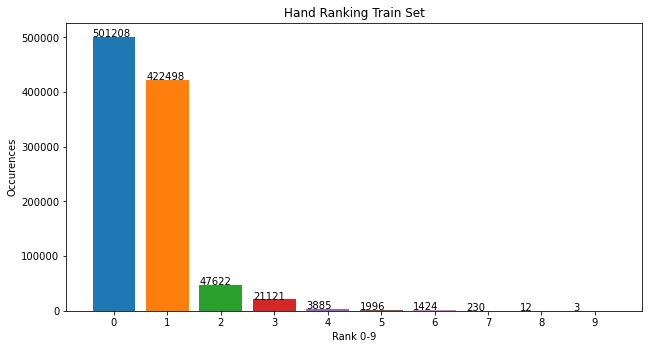

In [17]:
y = y_test.groupby(y_test).size()
hands = y.sum()
s = pd.DataFrame()
s["prob_hand"] = y.apply(lambda x: (x))
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1,0.1,.8,.8])
ax.set_title('Hand Ranking Train Set')
ax.set_xlabel('Rank 0-9')
ax.set_ylabel('Occurences')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
for val in range(len(s)):
    ax.annotate(str(s.iloc[val,0]), xy = (val, s.iloc[val,0]), xytext = (val-.4, s.iloc[val,0]))
    ax.bar(val,s.iloc[val,0])
plt.show()

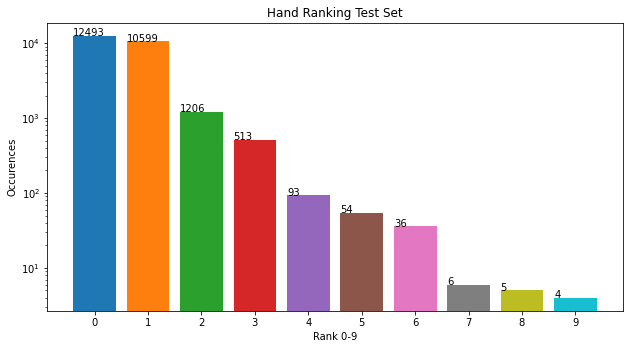

In [18]:
y = y_train.groupby(y_train).size()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1,0.1,.8,.8])
ax.set_title('Hand Ranking Test Set')
ax.set_xlabel('Rank 0-9')
ax.set_ylabel('Occurences')
ax.set_yscale('log')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
for val in range(len(y)):
    ax.annotate(str(y[val]), xy = (val, y[val]), xytext = (val-.4, y[val]))
    ax.bar(val,y[val])
plt.show()

X_test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5', 'Hand Rank']

X_train amounts of Cardinalities: 


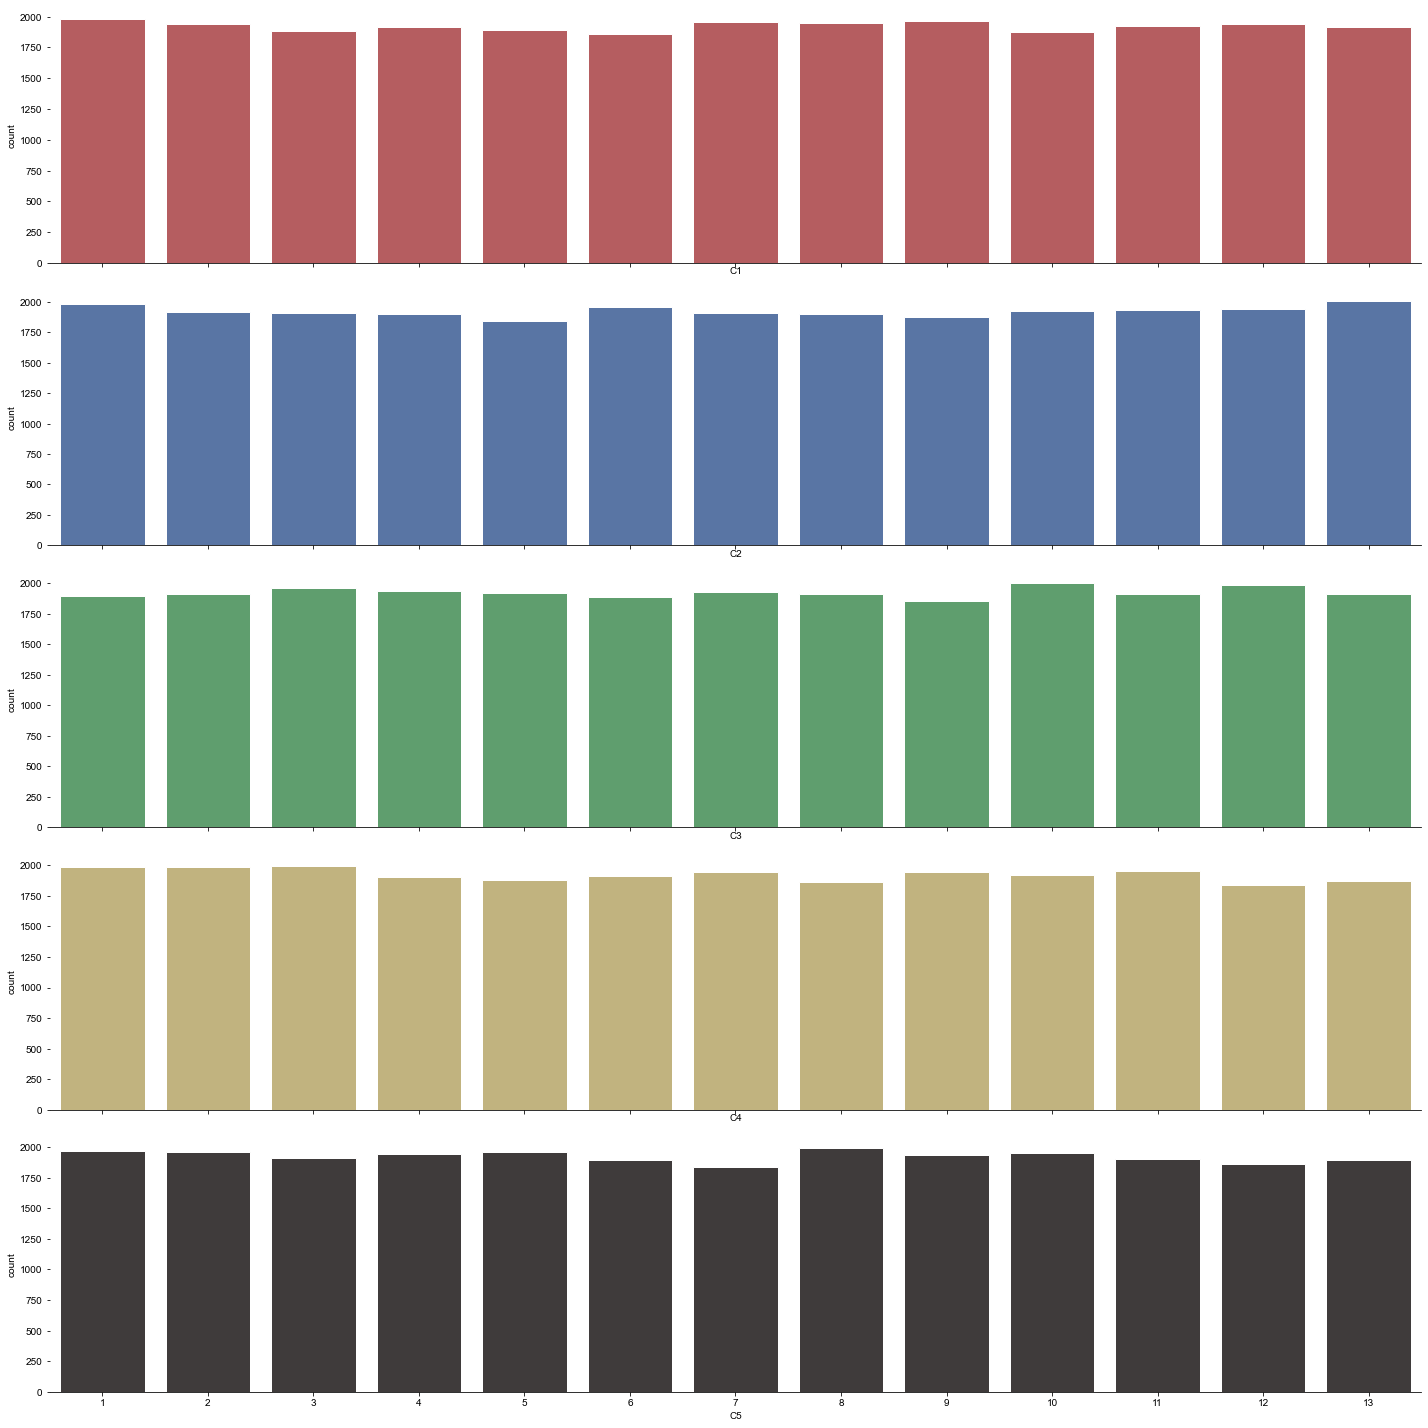

In [19]:
f, ax = plt.subplots(5, 1, figsize=(20, 20), sharex=True)
sns.set()
sns.despine(left=True)

print("X_train amounts of Cardinalities: ")

sns.countplot(X_train['C1'], color='r', ax=ax[0])

sns.countplot(X_train['C2'], color='b', ax=ax[1])

sns.countplot(X_train['C3'], color='g',ax=ax[2])

sns.countplot(X_train['C4'], color='y', ax=ax[3])

sns.countplot(X_train['C5'], color='#403A3A', ax=ax[4])

plt.tight_layout()

X_test amounts of Cardinalities: 


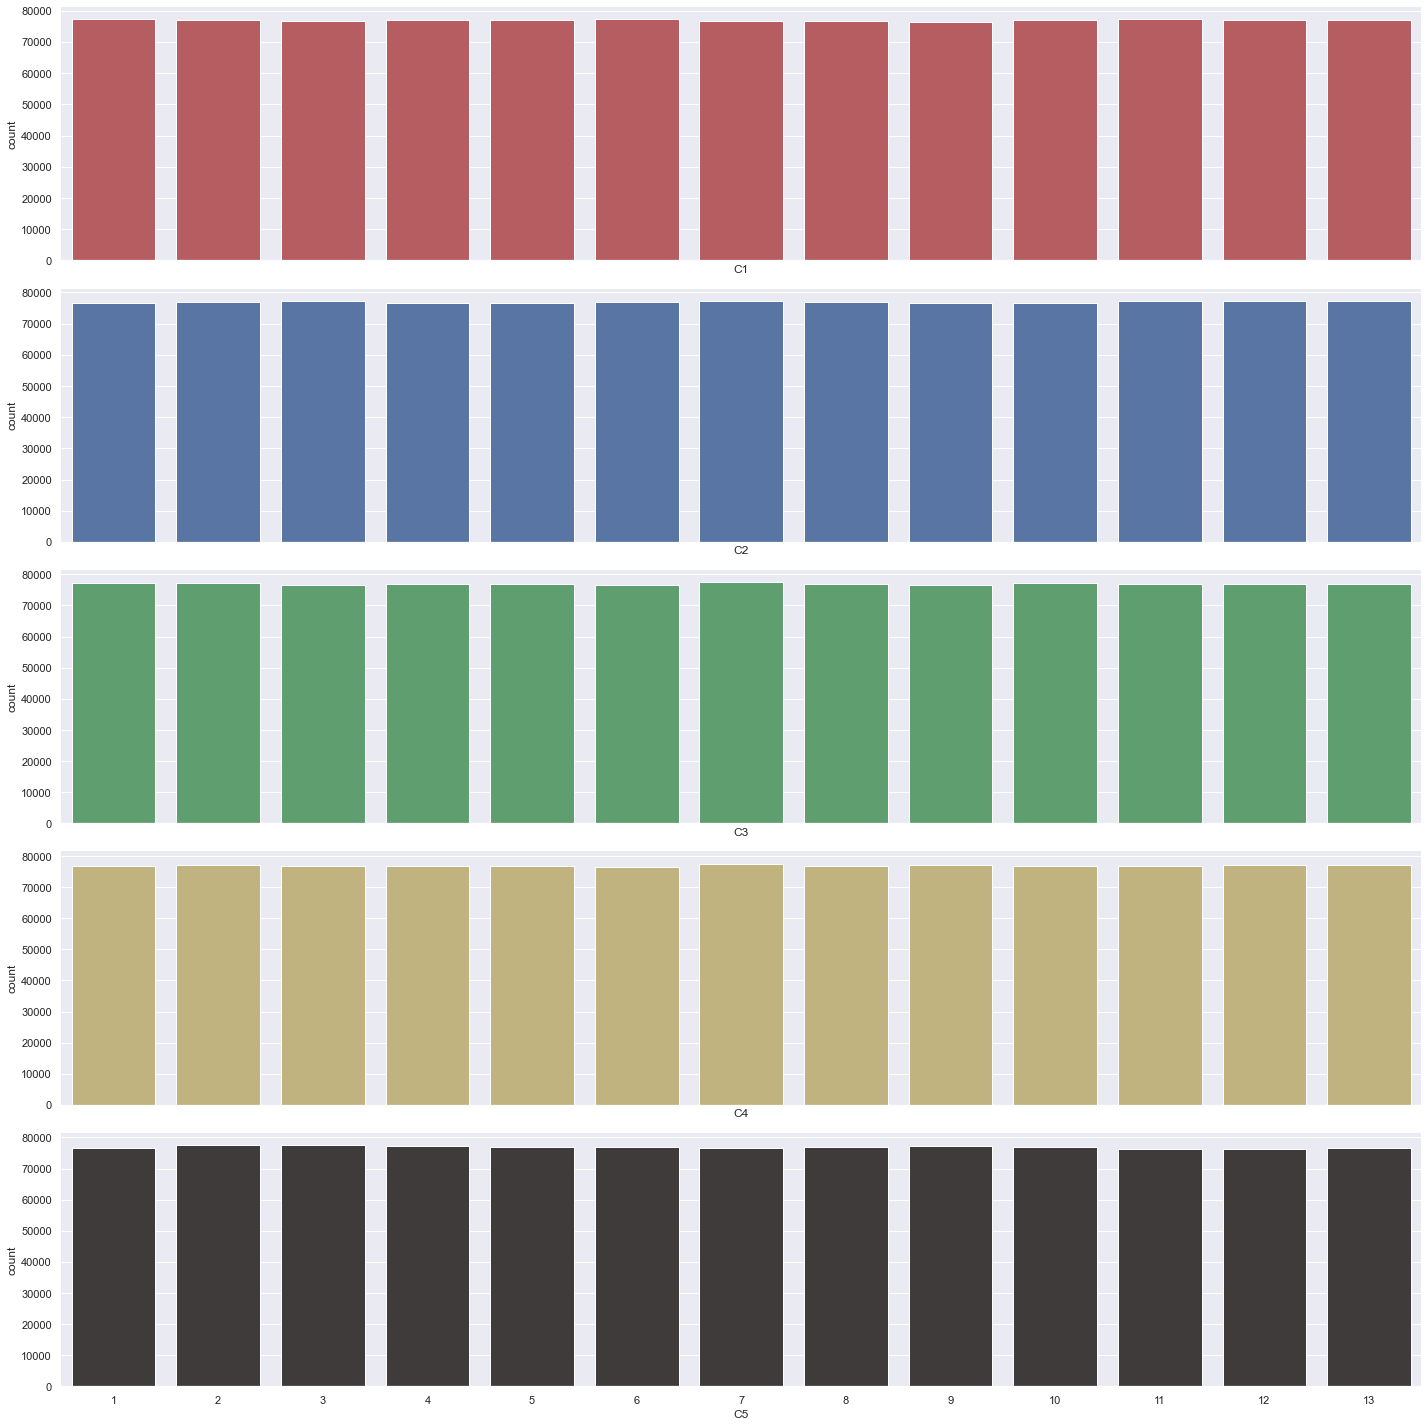

In [20]:
f, ax = plt.subplots(5, 1, figsize=(20, 20), sharex=True)
sns.set()
sns.despine(left=True)

print("X_test amounts of Cardinalities: ")

sns.countplot(X_test['C1'], color='r', ax=ax[0])

sns.countplot(X_test['C2'], color='b', ax=ax[1])

sns.countplot(X_test['C3'], color='g',ax=ax[2])

sns.countplot(X_test['C4'], color='y', ax=ax[3])

sns.countplot(X_test['C5'], color='#403A3A', ax=ax[4])

plt.tight_layout()

In [24]:
import pickle

X_train_pre = pickle.load(open('X_train_pre.pickle', 'rb'))
X_test_pre = pickle.load(open('X_test_pre.pickle', 'rb')) 

y_train_pre = pickle.load(open('y_train.pickle', 'rb')) 
y_test_pre = pickle.load(open('y_test.pickle', 'rb'))

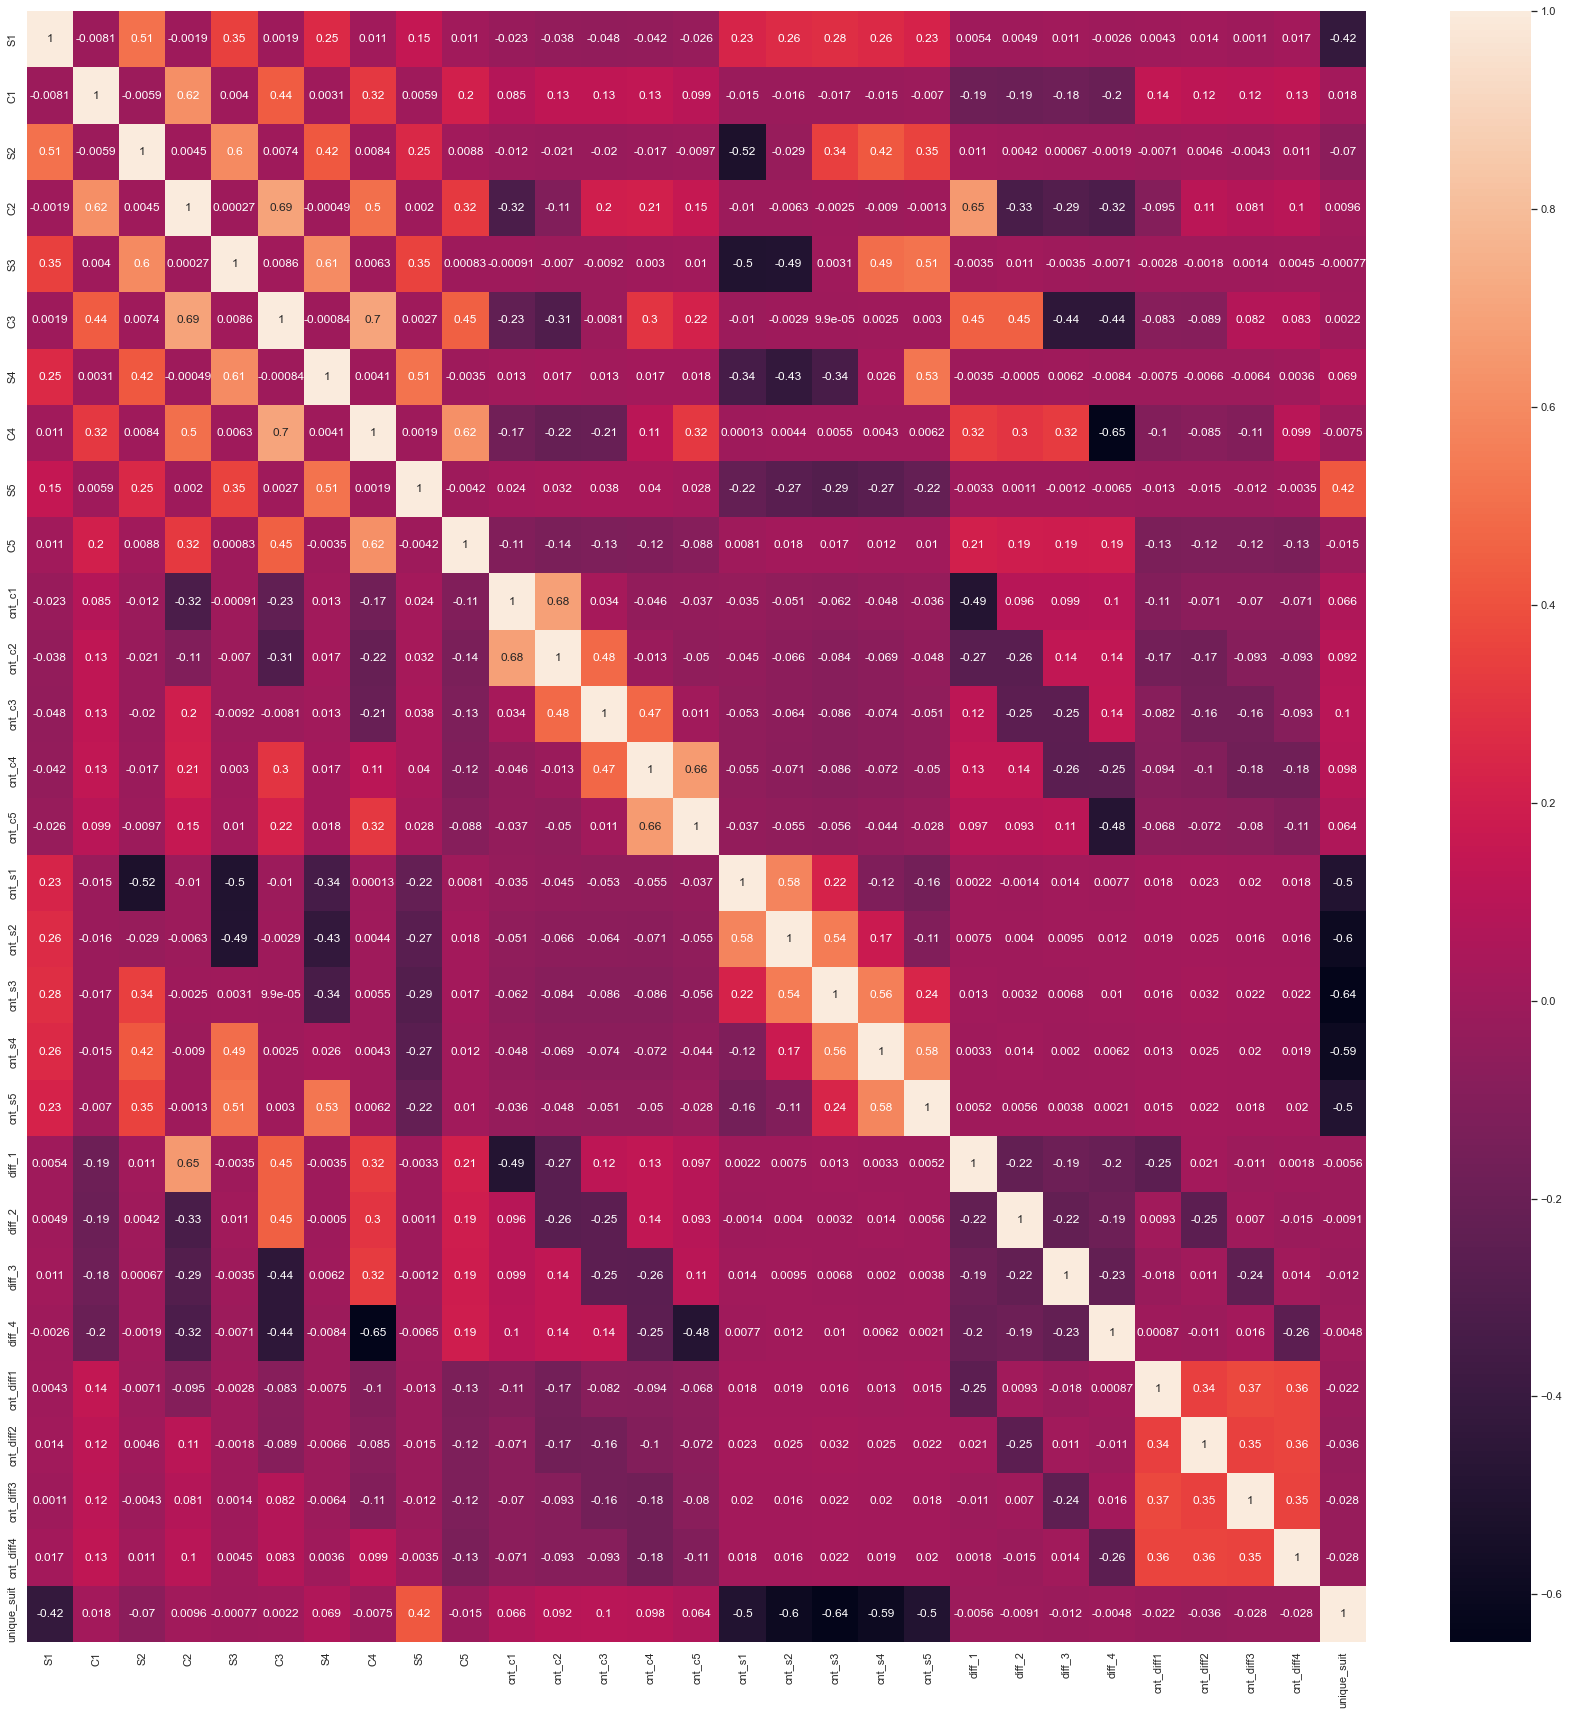

In [34]:
corr_matrix = X_train_pre.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()